# test method on kaggle data

In [1]:
import numpy as np
import pandas as pd
from subprocess import check_output
from sklearn import preprocessing, neighbors
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn import neighbors
from sklearn import naive_bayes
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
from sklearn import neural_network
import xgboost
import matplotlib.pyplot as plt

In [3]:
voice=pd.read_csv('voice.csv')
voice.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [4]:
voice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
meanfreq    3168 non-null float64
sd          3168 non-null float64
median      3168 non-null float64
Q25         3168 non-null float64
Q75         3168 non-null float64
IQR         3168 non-null float64
skew        3168 non-null float64
kurt        3168 non-null float64
sp.ent      3168 non-null float64
sfm         3168 non-null float64
mode        3168 non-null float64
centroid    3168 non-null float64
meanfun     3168 non-null float64
minfun      3168 non-null float64
maxfun      3168 non-null float64
meandom     3168 non-null float64
mindom      3168 non-null float64
maxdom      3168 non-null float64
dfrange     3168 non-null float64
modindx     3168 non-null float64
label       3168 non-null object
dtypes: float64(20), object(1)
memory usage: 519.8+ KB


In [5]:
voice.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [6]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
voice["label"] = le.fit_transform(voice["label"])
le.classes_

array(['female', 'male'], dtype=object)

In [7]:
voice[:]=preprocessing.MinMaxScaler().fit_transform(voice)
voice.head()

C:\Users\Max\Anaconda3\envs\torch\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.096419,0.473409,0.084125,0.060063,0.204956,0.254828,0.367853,0.208279,0.635798,0.564526,...,0.096419,0.157706,0.030501,0.981526,0.000000,0.006452,0.000000,0.000000,0.000000,1.0
1,0.125828,0.505075,0.116900,0.077635,0.215683,0.246961,0.644279,0.483766,0.630964,0.591578,...,0.125828,0.287642,0.031140,0.834600,0.000407,0.006452,0.002144,0.002146,0.056449,1.0
2,0.179222,0.675536,0.102873,0.034284,0.385912,0.457148,0.885255,0.782275,0.442738,0.548382,...,0.179222,0.236945,0.030264,0.954963,0.000060,0.006452,0.000357,0.000358,0.049885,1.0
3,0.528261,0.554611,0.587559,0.389906,0.715802,0.407358,0.031549,0.001613,0.923261,0.856457,...,0.528261,0.183442,0.041287,0.834600,0.065659,0.006452,0.025375,0.025393,0.265043,1.0
4,0.452195,0.627209,0.454272,0.317627,0.707515,0.474474,0.027742,0.001732,0.958736,0.926348,...,0.452195,0.279190,0.036829,0.929285,0.238994,0.006452,0.250536,0.250715,0.223380,1.0


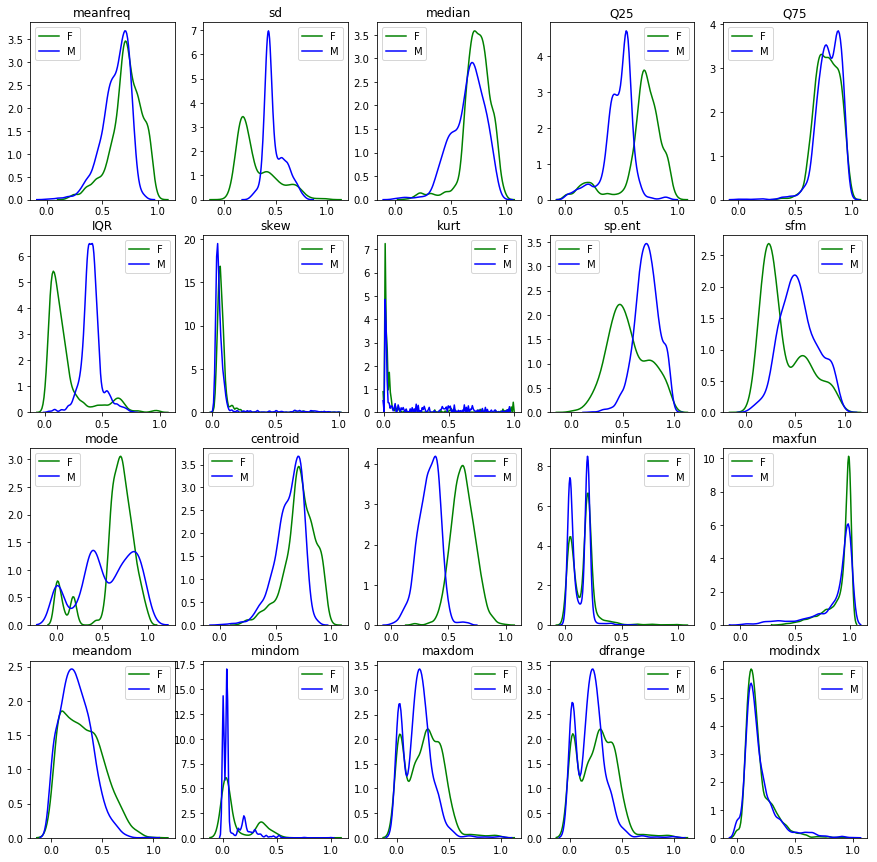

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(4,5,figsize=(15,15))
for i in range(1,21):
    plt.subplot(4,5,i)
    plt.title(voice.columns[i-1])
    sns.kdeplot(voice.loc[voice['label'] == 0, voice.columns[i-1]], color= 'green', label='F')
    sns.kdeplot(voice.loc[voice['label'] == 1, voice.columns[i-1]], color= 'blue', label='M')

In [9]:
# Split the data
train, test = train_test_split(voice, test_size=0.3)

In [10]:
train.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
1384,0.782970,0.417650,0.877043,0.580320,0.906078,0.393929,0.045526,0.003089,0.598778,0.324371,...,0.782970,0.374993,0.192834,0.946308,0.294505,0.040860,0.344889,0.344421,0.080484,1.0
849,0.634477,0.394821,0.695952,0.463444,0.742925,0.357204,0.033256,0.001546,0.721875,0.470895,...,0.634477,0.357838,0.194279,0.990585,0.278526,0.040860,0.256969,0.256438,0.114940,1.0
1561,0.583451,0.432880,0.481734,0.463467,0.792678,0.405437,0.104716,0.016061,0.671230,0.410812,...,0.583451,0.321271,0.147635,0.992409,0.075017,0.000000,0.033149,0.033307,0.342569,1.0
2680,0.755074,0.213410,0.735917,0.702417,0.766505,0.131600,0.057700,0.004997,0.552987,0.238018,...,0.755074,0.468652,0.192595,0.999749,0.584287,0.402151,0.496069,0.488197,0.162969,0.0
1960,0.483728,0.706722,0.623589,0.180781,0.756620,0.664390,0.025619,0.001163,0.932784,0.895863,...,0.483728,0.691116,0.383082,0.880415,0.148459,0.058065,0.042173,0.041130,0.414749,0.0


In [11]:
x_train = train.iloc[:, :-1]
y_train = train["label"]
x_test = test.iloc[:, :-1]
y_test = test["label"]

In [13]:
x_train3 = train[["meanfun","IQR","Q25"]]
y_train3 = train["label"]
x_test3 = test[["meanfun","IQR","Q25"]]
y_test3 = test["label"]

In [19]:
def plot_cm(y_true, y_pred, desc = None):
    labels = ["male", "female"]
    
    labeld = {0:'male', 1:'female'}
    y_true = [labeld[i] for i in y_true]
    y_pred = [labeld[i] for i in y_pred]

    mat = confusion_matrix(y_true, y_pred, labels=labels)
    accuracy = accuracy_score(y_true, y_pred)
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
                xticklabels=labels,
                yticklabels=labels)
    if desc != None:
        plt.title('{}:{}'.format(desc, accuracy))
    plt.xlabel('true label')
    plt.ylabel('predicted label');
    plt.show()

In [14]:
def classify(model,x_train,y_train,x_test,y_test, desc):
    from sklearn.metrics import classification_report
    target_names = ["female", "male"]
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    
    plot_cm(y_test, y_pred, desc = desc)
    accuracy = model.score(x_test, y_test)
    print('Accuracy='+str(accuracy))
    
    print(classification_report(y_test, y_pred, target_names=target_names, digits=4))

In [15]:
# K-Nearest Neighbors
def knn_error(k,x_train,y_train,x_test,y_test):
    error_rate = []
    K=range(1,k)
    for i in K:
        knn = neighbors.KNeighborsClassifier(n_neighbors = i)
        knn.fit(x_train, y_train)
        y_pred = knn.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    kloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at k=%s." % (error_rate[kloc], K[kloc]))

    plt.plot(K, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. K Value')
    plt.xlabel('K')
    plt.ylabel('Error Rate')
    plt.show()
    return K[kloc]

Lowest error is 0.016824395373291272 occurs at k=4.


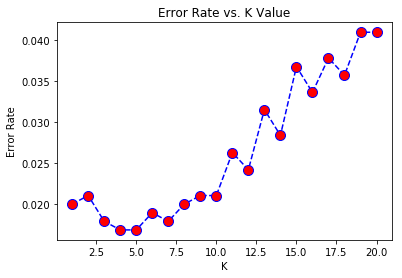

In [17]:
k=knn_error(21,x_train,y_train,x_test,y_test)

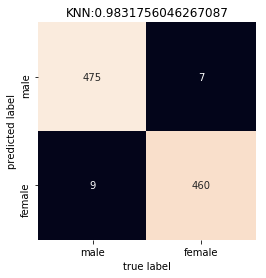

Accuracy=0.9831756046267087
              precision    recall  f1-score   support

      female     0.9855    0.9814    0.9834       484
        male     0.9808    0.9850    0.9829       467

   micro avg     0.9832    0.9832    0.9832       951
   macro avg     0.9831    0.9832    0.9832       951
weighted avg     0.9832    0.9832    0.9832       951



In [20]:
model = neighbors.KNeighborsClassifier(n_neighbors = k)
classify(model,x_train,y_train,x_test,y_test, desc = 'KNN')

Lowest error is 0.022082018927444796 occurs at k=6.


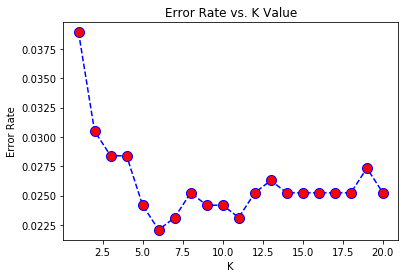

In [22]:
k=knn_error(21,x_train3,y_train3,x_test3,y_test3)

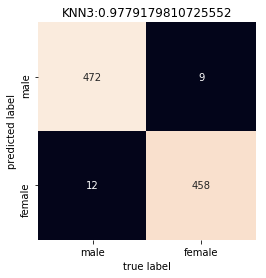

Accuracy=0.9779179810725552
              precision    recall  f1-score   support

      female     0.9813    0.9752    0.9782       484
        male     0.9745    0.9807    0.9776       467

   micro avg     0.9779    0.9779    0.9779       951
   macro avg     0.9779    0.9780    0.9779       951
weighted avg     0.9779    0.9779    0.9779       951



In [23]:
model = neighbors.KNeighborsClassifier(n_neighbors = k)
classify(model,x_train3,y_train3,x_test3,y_test3, desc = 'KNN3')

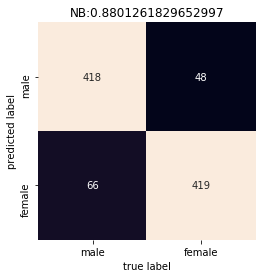

Accuracy=0.8801261829652997
              precision    recall  f1-score   support

      female     0.8970    0.8636    0.8800       484
        male     0.8639    0.8972    0.8803       467

   micro avg     0.8801    0.8801    0.8801       951
   macro avg     0.8805    0.8804    0.8801       951
weighted avg     0.8808    0.8801    0.8801       951



In [24]:
# Naive Bayes
model=naive_bayes.GaussianNB()
classify(model,x_train,y_train,x_test,y_test, desc = "NB")

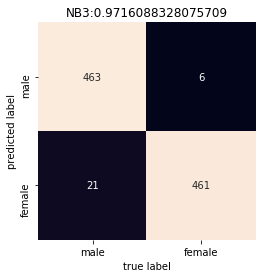

Accuracy=0.9716088328075709
              precision    recall  f1-score   support

      female     0.9872    0.9566    0.9717       484
        male     0.9564    0.9872    0.9715       467

   micro avg     0.9716    0.9716    0.9716       951
   macro avg     0.9718    0.9719    0.9716       951
weighted avg     0.9721    0.9716    0.9716       951



In [25]:
model=naive_bayes.GaussianNB()
classify(model,x_train3,y_train3,x_test3,y_test3, desc = "NB3")

In [26]:
# Decision Tree
#Find the best parameter to prune the tree
def dt_error(n,x_train,y_train,x_test,y_test):
    nodes = range(2, n)
    error_rate = []
    for k in nodes:
        model = tree.DecisionTreeClassifier(max_leaf_nodes=k)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    kloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at n=%s." % (error_rate[kloc], nodes[kloc]))
    plt.plot(nodes, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.xlabel('Tree Size')
    plt.ylabel('Cross-Validated MSE')
    plt.show()
    return nodes[kloc]

Lowest error is 0.035751840168243953 occurs at n=9.


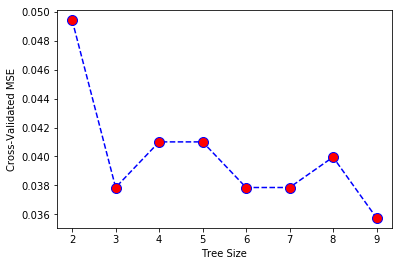

In [27]:
n=dt_error(10,x_train,y_train,x_test,y_test)

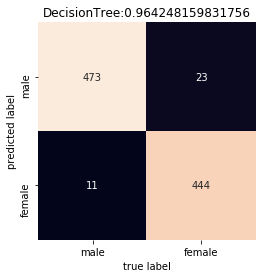

Accuracy=0.964248159831756
              precision    recall  f1-score   support

      female     0.9536    0.9773    0.9653       484
        male     0.9758    0.9507    0.9631       467

   micro avg     0.9642    0.9642    0.9642       951
   macro avg     0.9647    0.9640    0.9642       951
weighted avg     0.9645    0.9642    0.9642       951



In [28]:
#prune tree
pruned_tree = tree.DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes = n)
classify(pruned_tree,x_train,y_train,x_test,y_test, desc = 'DecisionTree')

Lowest error is 0.028391167192429023 occurs at n=5.


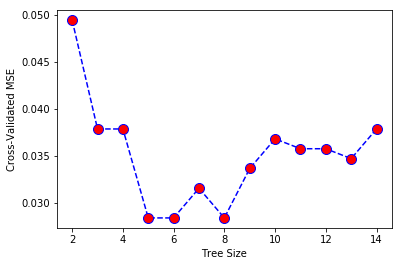

In [29]:
n=dt_error(15,x_train3,y_train3,x_test3,y_test3)

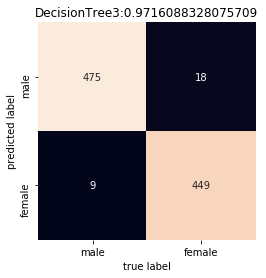

Accuracy=0.9716088328075709
              precision    recall  f1-score   support

      female     0.9635    0.9814    0.9724       484
        male     0.9803    0.9615    0.9708       467

   micro avg     0.9716    0.9716    0.9716       951
   macro avg     0.9719    0.9714    0.9716       951
weighted avg     0.9718    0.9716    0.9716       951



In [30]:
pruned_tree = tree.DecisionTreeClassifier(criterion = 'gini', max_leaf_nodes = n)
classify(pruned_tree,x_train3,y_train3,x_test3,y_test3, desc = 'DecisionTree3')

In [31]:
# Random Forest
def rf_error(n,x_train,y_train,x_test,y_test):
    error_rate = []
    e=range(1,n,20)
    for i in e:
        model = ensemble.RandomForestClassifier(n_estimators = i)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    nloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at n=%s." % (error_rate[nloc], e[nloc]))

    plt.plot(e, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. n Value')
    plt.xlabel('n')
    plt.ylabel('Error Rate')
    plt.show()
    return e[nloc]

Lowest error is 0.013669821240799159 occurs at n=61.


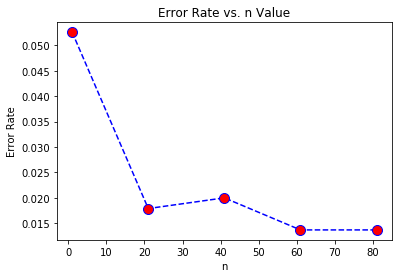

In [32]:
e=rf_error(100,x_train,y_train,x_test,y_test)

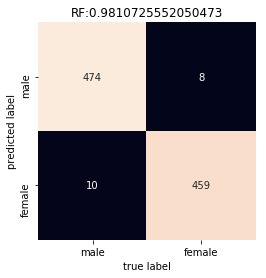

Accuracy=0.9810725552050473
              precision    recall  f1-score   support

      female     0.9834    0.9793    0.9814       484
        male     0.9787    0.9829    0.9808       467

   micro avg     0.9811    0.9811    0.9811       951
   macro avg     0.9810    0.9811    0.9811       951
weighted avg     0.9811    0.9811    0.9811       951



In [33]:
model=ensemble.RandomForestClassifier(n_estimators = e)
classify(model,x_train,y_train,x_test,y_test,desc="RF")

Lowest error is 0.022082018927444796 occurs at n=81.


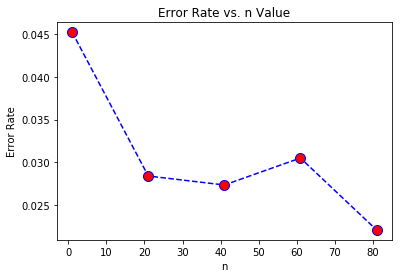

In [34]:
e=rf_error(100,x_train3,y_train3,x_test3,y_test3)

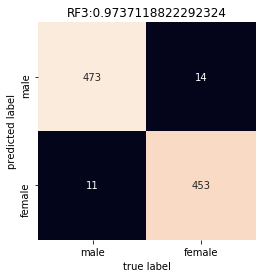

Accuracy=0.9737118822292324
              precision    recall  f1-score   support

      female     0.9713    0.9773    0.9743       484
        male     0.9763    0.9700    0.9731       467

   micro avg     0.9737    0.9737    0.9737       951
   macro avg     0.9738    0.9736    0.9737       951
weighted avg     0.9737    0.9737    0.9737       951



In [35]:
model=ensemble.RandomForestClassifier(n_estimators = e)
classify(model,x_train3,y_train3,x_test3,y_test3,desc="RF3")

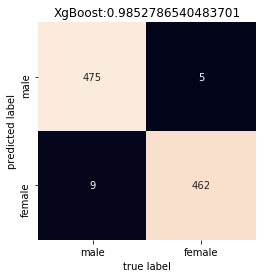

Accuracy=0.9852786540483701
              precision    recall  f1-score   support

      female     0.9896    0.9814    0.9855       484
        male     0.9809    0.9893    0.9851       467

   micro avg     0.9853    0.9853    0.9853       951
   macro avg     0.9852    0.9853    0.9853       951
weighted avg     0.9853    0.9853    0.9853       951



In [36]:
# XgBoost
model = xgboost.XGBClassifier()
classify(model,x_train,y_train,x_test,y_test,desc="XgBoost")

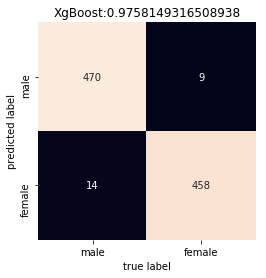

Accuracy=0.9758149316508938
              precision    recall  f1-score   support

      female     0.9812    0.9711    0.9761       484
        male     0.9703    0.9807    0.9755       467

   micro avg     0.9758    0.9758    0.9758       951
   macro avg     0.9758    0.9759    0.9758       951
weighted avg     0.9759    0.9758    0.9758       951



In [37]:
model = xgboost.XGBClassifier()
classify(model,x_train3,y_train3,x_test3,y_test3,desc="XgBoost")

In [38]:
# Support Vector Machine
def svm_kernel(x_train,y_train,x_test,y_test):
    rate=[]
    kernel=['rbf','poly','linear']
    for i in kernel:
        model=svm.SVC(kernel=i, gamma='scale').fit(x_train,y_train)
        y_pred=model.predict(x_train)
        print(i, ' in-sample accuracy in SVM: ', accuracy_score(y_train,y_pred))
        y_pred=model.predict(x_test)
        print(i, ' out-of-sample accuracy in SVM: ', accuracy_score(y_test,y_pred))
        rate.append(accuracy_score(y_test,y_pred))
    nloc = rate.index(max(rate))
    print("Highest accuracy is %s occurs at %s kernel." % (rate[nloc], kernel[nloc]))
    return kernel[nloc]

In [39]:
def svm_error(k,C,x_train,y_train,x_test,y_test):
    error_rate = []
    C=range(1,C)
    for i in C:
        model=svm.SVC(kernel=k,C=i, gamma='scale').fit(x_train,y_train)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    cloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at C=%s." % (error_rate[cloc], C[cloc]))

    plt.plot(C, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. C Value')
    plt.xlabel('C')
    plt.ylabel('Error Rate')
    plt.show()
    return C[cloc]

In [40]:
k=svm_kernel(x_train,y_train,x_test,y_test)

rbf  in-sample accuracy in SVM:  0.9769959404600812
rbf  out-of-sample accuracy in SVM:  0.9800210304942166
poly  in-sample accuracy in SVM:  0.9801533603969328
poly  out-of-sample accuracy in SVM:  0.9800210304942166
linear  in-sample accuracy in SVM:  0.9738385205232296
linear  out-of-sample accuracy in SVM:  0.9758149316508938
Highest accuracy is 0.9800210304942166 occurs at rbf kernel.


Lowest error is 0.013669821240799159 occurs at C=8.


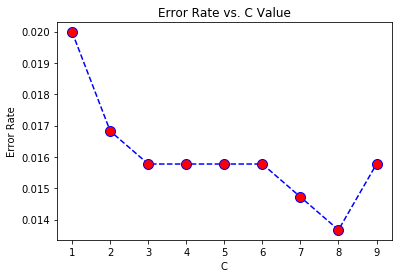

In [41]:
c=svm_error(k,10,x_train,y_train,x_test,y_test)

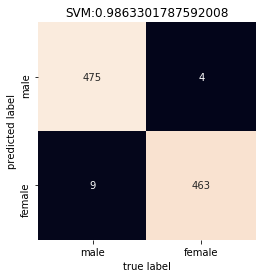

Accuracy=0.9863301787592008
              precision    recall  f1-score   support

      female     0.9916    0.9814    0.9865       484
        male     0.9809    0.9914    0.9862       467

   micro avg     0.9863    0.9863    0.9863       951
   macro avg     0.9863    0.9864    0.9863       951
weighted avg     0.9864    0.9863    0.9863       951



In [42]:
model=svm.SVC(kernel=k,C=c, gamma='scale')
classify(model,x_train,y_train,x_test,y_test, desc='SVM')

In [43]:
k=svm_kernel(x_train3,y_train3,x_test3,y_test3)

rbf  in-sample accuracy in SVM:  0.9711321605773567
rbf  out-of-sample accuracy in SVM:  0.9768664563617245
poly  in-sample accuracy in SVM:  0.9711321605773567
poly  out-of-sample accuracy in SVM:  0.9674027339642481
linear  in-sample accuracy in SVM:  0.9661705006765899
linear  out-of-sample accuracy in SVM:  0.9663512092534174
Highest accuracy is 0.9768664563617245 occurs at rbf kernel.


Lowest error is 0.023133543638275498 occurs at C=1.


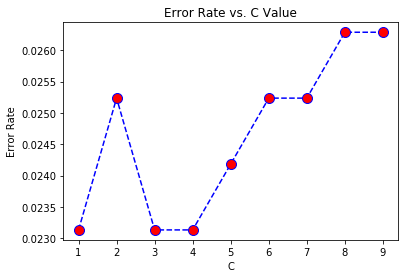

In [44]:
c=svm_error(k,10,x_train3,y_train3,x_test3,y_test3)

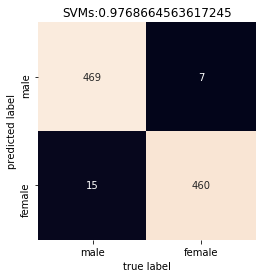

Accuracy=0.9768664563617245
              precision    recall  f1-score   support

      female     0.9853    0.9690    0.9771       484
        male     0.9684    0.9850    0.9766       467

   micro avg     0.9769    0.9769    0.9769       951
   macro avg     0.9769    0.9770    0.9769       951
weighted avg     0.9770    0.9769    0.9769       951



In [45]:
model=svm.SVC(kernel=k,C=c, gamma='scale')
classify(model,x_train3,y_train3,x_test3,y_test3, desc='SVMs')

In [46]:
# Neural Network
def nn_error(n,x_train,y_train,x_test,y_test):
    error_rate = []
    hidden_layer=range(1,n)
    for i in hidden_layer:
        model = neural_network.MLPClassifier(solver='adam', alpha=1e-5,
                                       hidden_layer_sizes=i,
                                       activation='logistic',random_state=17,
                                       max_iter=2000)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        error_rate.append(np.mean(y_pred != y_test))
    kloc = error_rate.index(min(error_rate))
    print("Lowest error is %s occurs at C=%s." % (error_rate[kloc], hidden_layer[kloc]))

    plt.plot(hidden_layer, error_rate, color='blue', linestyle='dashed', marker='o',
             markerfacecolor='red', markersize=10)
    plt.title('Error Rate vs. Hidden Layer Size')
    plt.xlabel('Size')
    plt.ylabel('Error Rate')
    plt.show()
    return hidden_layer[kloc]

Lowest error is 0.026288117770767613 occurs at C=12.


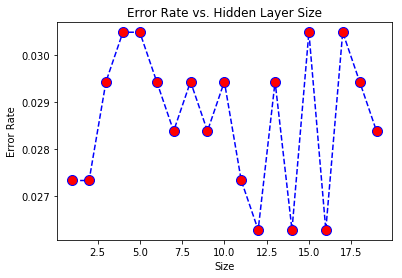

In [47]:
h=nn_error(20,x_train,y_train,x_test,y_test)

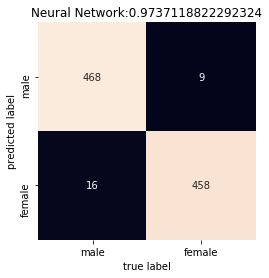

Accuracy=0.9737118822292324
              precision    recall  f1-score   support

      female     0.9811    0.9669    0.9740       484
        male     0.9662    0.9807    0.9734       467

   micro avg     0.9737    0.9737    0.9737       951
   macro avg     0.9737    0.9738    0.9737       951
weighted avg     0.9738    0.9737    0.9737       951



In [48]:
model = neural_network.MLPClassifier(solver='adam', alpha=1e-5,
                                       hidden_layer_sizes=h,
                                       activation='logistic',random_state=17,
                                       max_iter=2000)
classify(model,x_train,y_train,x_test,y_test, desc='Neural Network')

Lowest error is 0.028391167192429023 occurs at C=5.


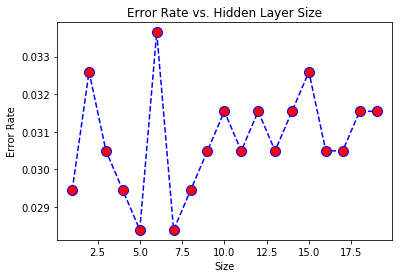

In [49]:
h=nn_error(20,x_train3,y_train3,x_test3,y_test3)

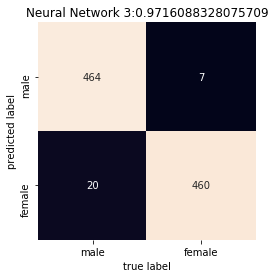

Accuracy=0.9716088328075709
              precision    recall  f1-score   support

      female     0.9851    0.9587    0.9717       484
        male     0.9583    0.9850    0.9715       467

   micro avg     0.9716    0.9716    0.9716       951
   macro avg     0.9717    0.9718    0.9716       951
weighted avg     0.9720    0.9716    0.9716       951



In [51]:
model = neural_network.MLPClassifier(solver='adam', alpha=1e-5,
                                       hidden_layer_sizes=h,
                                       activation='logistic',random_state=17,
                                       max_iter=2000)
classify(model,x_train3,y_train3,x_test3,y_test3, desc='Neural Network 3')